# Betweenness Centrality
In this notebooks we compute the betweenness centrality, and we test its significance.


In [1]:
import sys

sys.path.insert(0, "../")


import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scripts.get_graph import get_graph
import numpy as np
from scripts.hid_haus import hid_hous
import scripts.features_extraction as fe

## Create the graphs

In [2]:
adjacency_matrix = pd.read_csv("../../dataset/large_adjacency_matrix.csv", compression='gzip').values


graph = get_graph(adjacency_matrix)

# Get the nodes of each partition (diseases and symptoms)
diseases = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
symptoms = set(graph) - diseases

# Create unipartite projections
g_diseases = nx.bipartite.projected_graph(graph, diseases)
g_symptoms = nx.bipartite.projected_graph(graph, symptoms)

## Compute the betweenness centrality

In [41]:
graph_betweenness_bipartite = nx.bipartite.betweenness_centrality(graph, nodes=diseases)
graph_betweenness = nx.betweenness_centrality(graph)
diseases_betweenness = nx.betweenness_centrality(g_diseases)
symptoms_betweenness = nx.betweenness_centrality(g_symptoms)

print("Average Betweenness Centrality:")
print("Whole graph bipartite: %.6f" % np.mean(list(graph_betweenness.values())))
print("Whole graph: %.6f" % np.mean(list(graph_betweenness.values())))
print("Diseases projection graph: %.6f" % np.mean(list(diseases_betweenness.values())))
print("Symptoms projection graph: %.6f" % np.mean(list(symptoms_betweenness.values())))

Average Betweenness Centrality:
Whole graph bipartite: 0.002535
Whole graph: 0.002535
Diseases projection graph: 0.001043
Symptoms projection graph: 0.003250


In [14]:
# Creates the features for the betweenness of the entire bipartite graph
graph_betweenness_symptoms_only = list(graph_betweenness.items())[-adjacency_matrix.shape[1]:]
graph_betweenness_symptoms_only = [val for i, val in graph_betweenness_symptoms_only]

data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv", compression='gzip')
x, y = fe.get_x_y(graph_betweenness_symptoms_only, data_onehot, store_path = "../prediction_model/features/betweennes.npz")

#### Betweenness Centrality Visualization 

Text(0, 0.5, 'Frequency (log scale)')

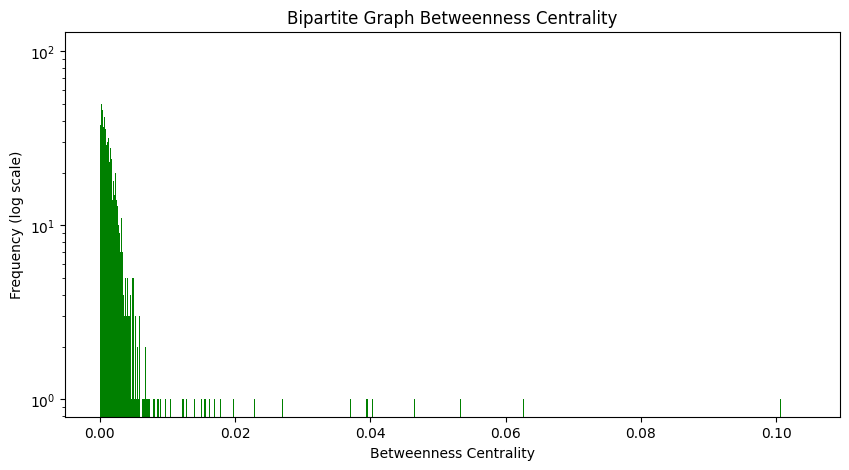

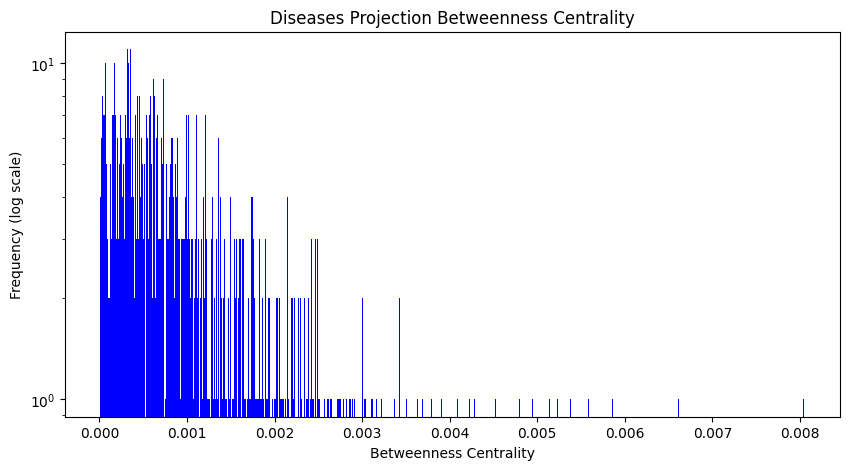

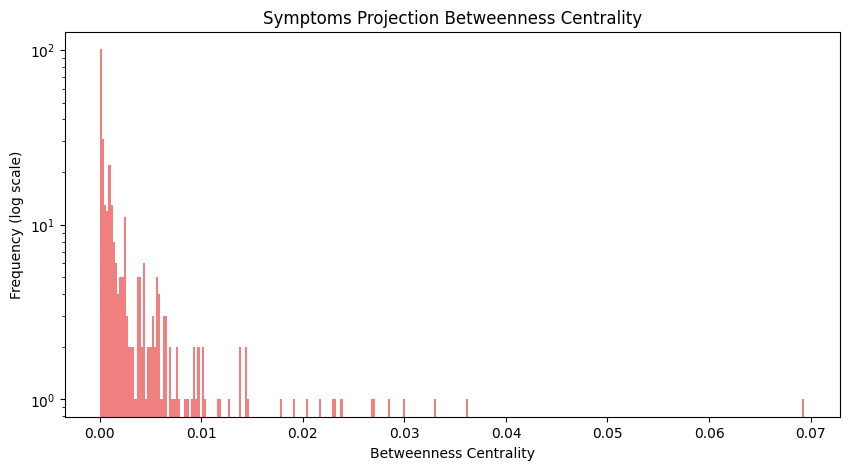

In [15]:
# Comparison of betweenness centrality of the bipartite graph and its projections

# Plot the betweenness centrality of the bipartite graph
plt.figure(figsize=(10, 5))
plt.hist(
    graph_betweenness.values(),
    bins=graph.number_of_nodes(),
    log=True,
    color="green",
)
plt.title("Bipartite Graph Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

# Plot the betweenness centrality of the diseases projection
plt.figure(figsize=(10, 5))
plt.hist(
    diseases_betweenness.values(),
    bins=g_diseases.number_of_nodes(),
    log=True,
    color="blue",
)
plt.title("Diseases Projection Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

# Plot the betweenness centrality of the symptoms projection
plt.figure(figsize=(10, 5))
plt.hist(
    symptoms_betweenness.values(),
    bins=g_symptoms.number_of_nodes(),
    log=True,
    color="lightcoral",
)
plt.title("Symptoms Projection Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")

Diseases nodes only: 0.001554
Symptoms nodes only: 0.004792
10 nodes with highest betweenness centrality:


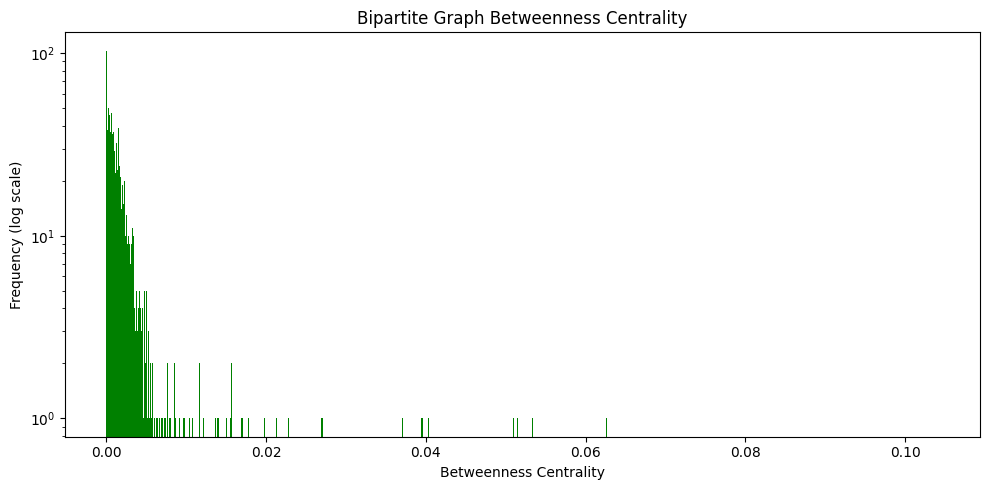

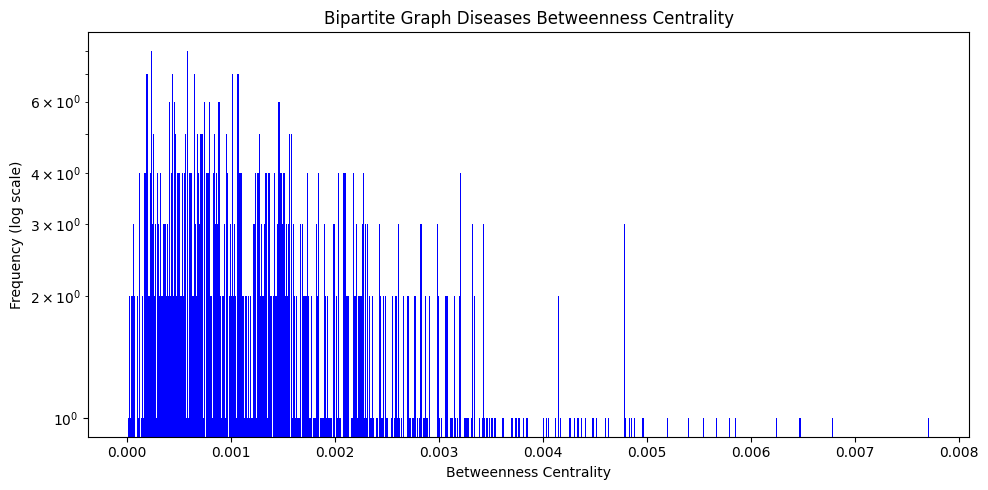

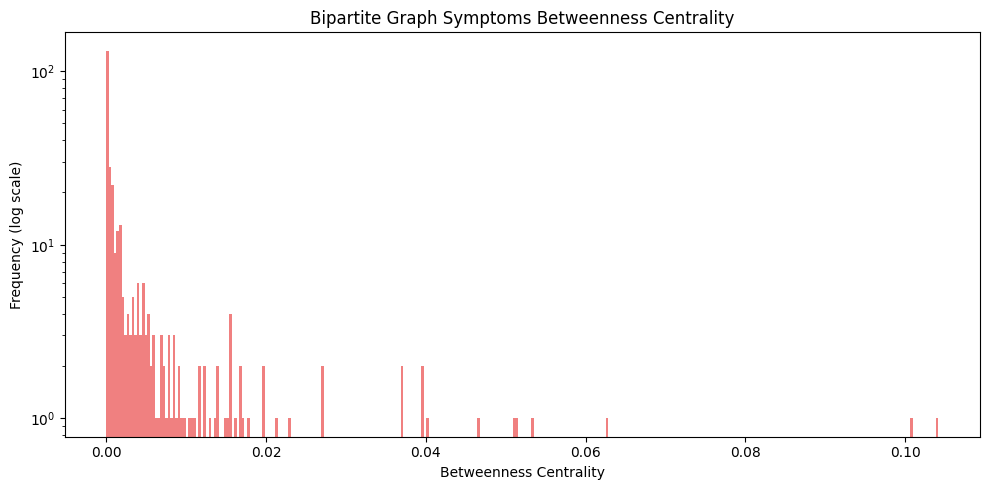

In [43]:
# Comparison of betweenness centrality distribution of the bipartite graph and that of single classes (diseases and symptoms)

# Plot the betweenness centrality of the bipartite graph
plt.figure(figsize=(10, 5))
plt.hist(
    graph_betweenness.values(),
    bins=graph.number_of_nodes(),
    log=True,
    color="green",
)
plt.title("Bipartite Graph Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()

# Plot the betweenness centrality of only the diseases
diseases = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
graph_betweenness_diseases_only = {k: v for k, v in graph_betweenness.items() if k in diseases}
plt.figure(figsize=(10, 5))
plt.hist(
    graph_betweenness_diseases_only.values(),
    bins=len(diseases),
    log=True,
    color="blue",
)
plt.title("Bipartite Graph Diseases Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()

# Plot the betweenness centrality of only the symptoms
symptoms = set(graph) - diseases
graph_betweenness_symptoms_only = {k: v for k, v in graph_betweenness.items() if k in symptoms}
plt.figure(figsize=(10, 5))
plt.hist(
    graph_betweenness_symptoms_only.values(),
    bins=len(symptoms),
    log=True,
    color="lightcoral",
)
plt.title("Bipartite Graph Symptoms Betweenness Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()


print("Diseases nodes only: %.6f" % np.mean(list(graph_betweenness_diseases_only.values())))
print("Symptoms nodes only: %.6f" % np.mean(list(graph_betweenness_symptoms_only.values())))

# Get the 10 nodes with highest betweenness centrality
print("10 nodes with highest betweenness centrality:")
top_betweenneess = sorted(graph_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# import symptoms names
symptoms_names = pd.read_csv("../../dataset/symptoms.csv")



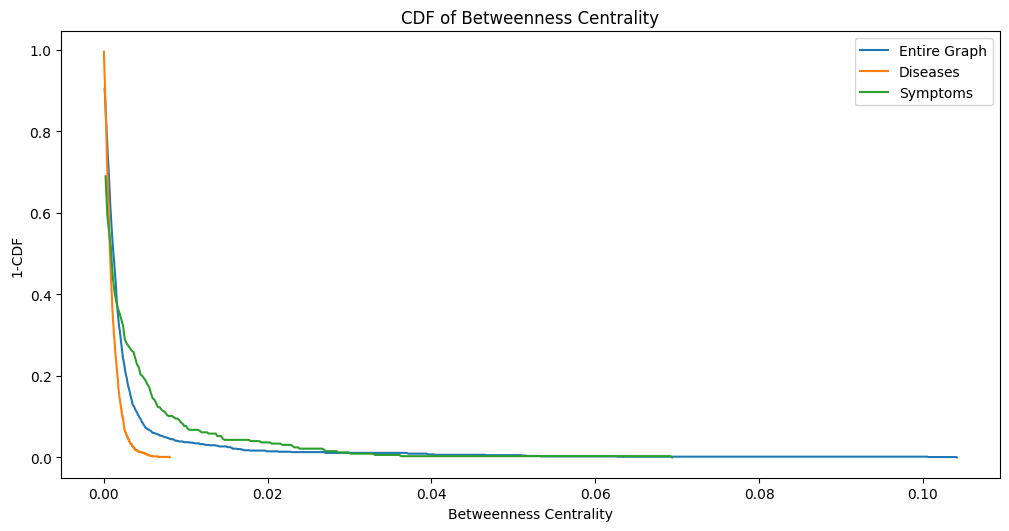

In [70]:
def plot_cdfs(betweennesses, labels):
	# getting data of the histogram 
	plt.figure(figsize=(10, 5))	
	for i in range(len(labels)):
		count, bins_count = np.histogram([val for val in betweennesses[i].values()], len([val for val in betweennesses[i].values()])) 
		pdf = count / sum(count) 
		cdf = np.cumsum(pdf)

		# plotting CDFs
		plt.plot(bins_count[1:], (1-cdf), label=labels[i])
		#plt.scatter(bins_count[1:], count)

	plt.tight_layout()
	plt.xlabel("Betweenness Centrality")
	plt.ylabel("1-CDF")
	plt.title("CDF of Betweenness Centrality")
	plt.legend()

betweennesses = [graph_betweenness, diseases_betweenness, symptoms_betweenness]
labels = ["Entire Graph", "Diseases", "Symptoms"]
plot_cdfs(betweennesses, labels)

feeling ill 0.10415128714801465
nausea 0.1006358350156598
nasal congestion 0.06262067553244961
insomnia 0.05333089167732178
depressive or psychotic symptoms 0.051454286808942436
dizziness 0.05102520068536303
headache 0.04653041553112914
neck pain 0.040287338345679644
hip pain 0.03957800938149851
sharp chest pain 0.039478134833799965


/tmp/ipykernel_7679/1630415045.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_betweenneess_names[i,0] = symptoms_names.iloc[index][0]
/tmp/ipykernel_7679/1630415045.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(symptoms_names.iloc[index][0], top_betweenneess[i][1])


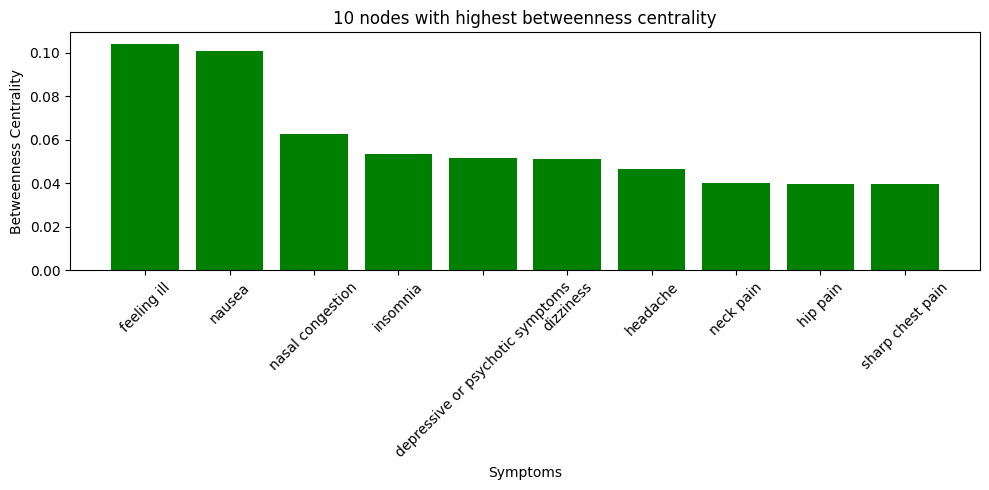

In [72]:
top_betweenneess_names = np.zeros((10,2), dtype=object)

for i in range(len(top_betweenneess)):
     index = top_betweenneess[i][0] -747
     top_betweenneess_names[i,0] = symptoms_names.iloc[index][0]
     top_betweenneess_names[i,1] = top_betweenneess[i][1]
     print(symptoms_names.iloc[index][0], top_betweenneess[i][1])

# Plot the betweenness centrality of the 10 nodes with highest betweenness centrality
plt.figure(figsize=(10, 5))
plt.bar(
    top_betweenneess_names[:,0],
    top_betweenneess_names[:,1],
    color="green",
)
# add the names of the symptoms
plt.xticks(top_betweenneess_names[:,0], rotation=45)
plt.title("10 nodes with highest betweenness centrality")
plt.xlabel("Symptoms")
plt.ylabel("Betweenness Centrality")
plt.tight_layout()


<BarContainer object of 748 artists>

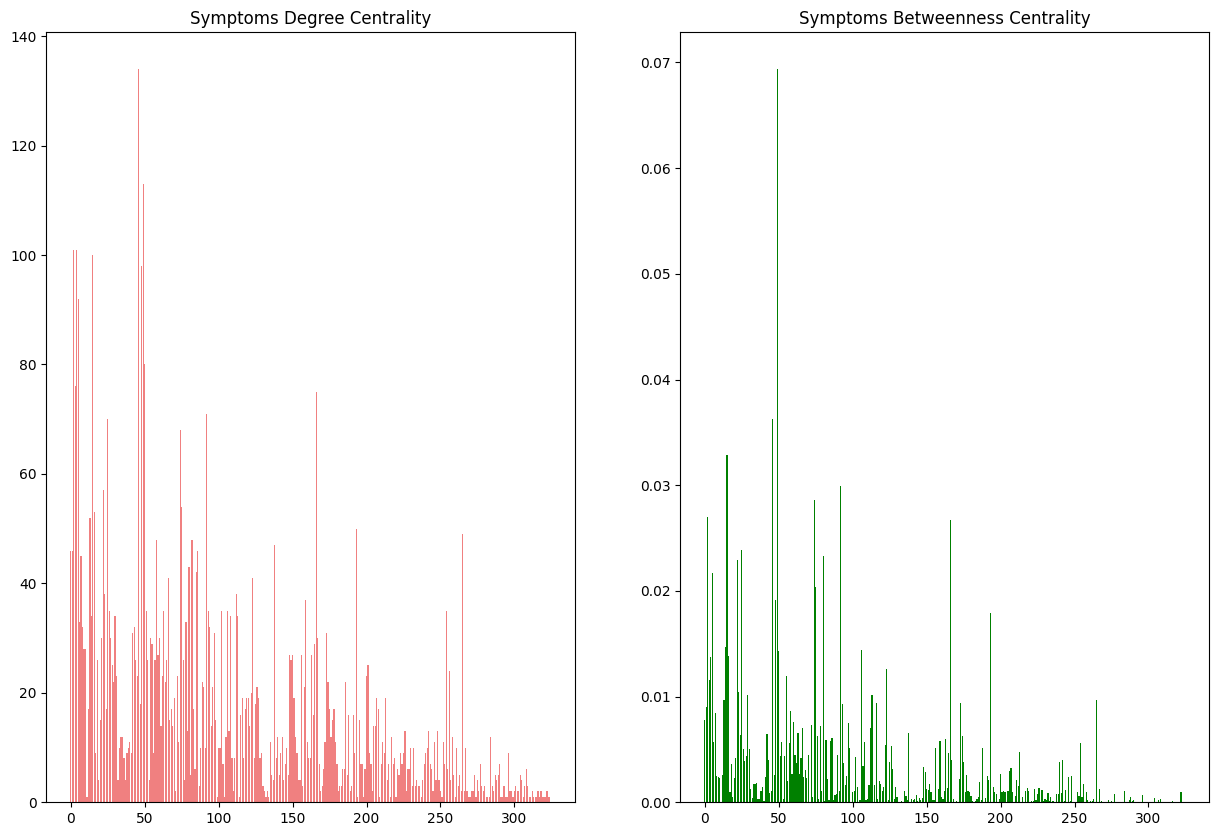

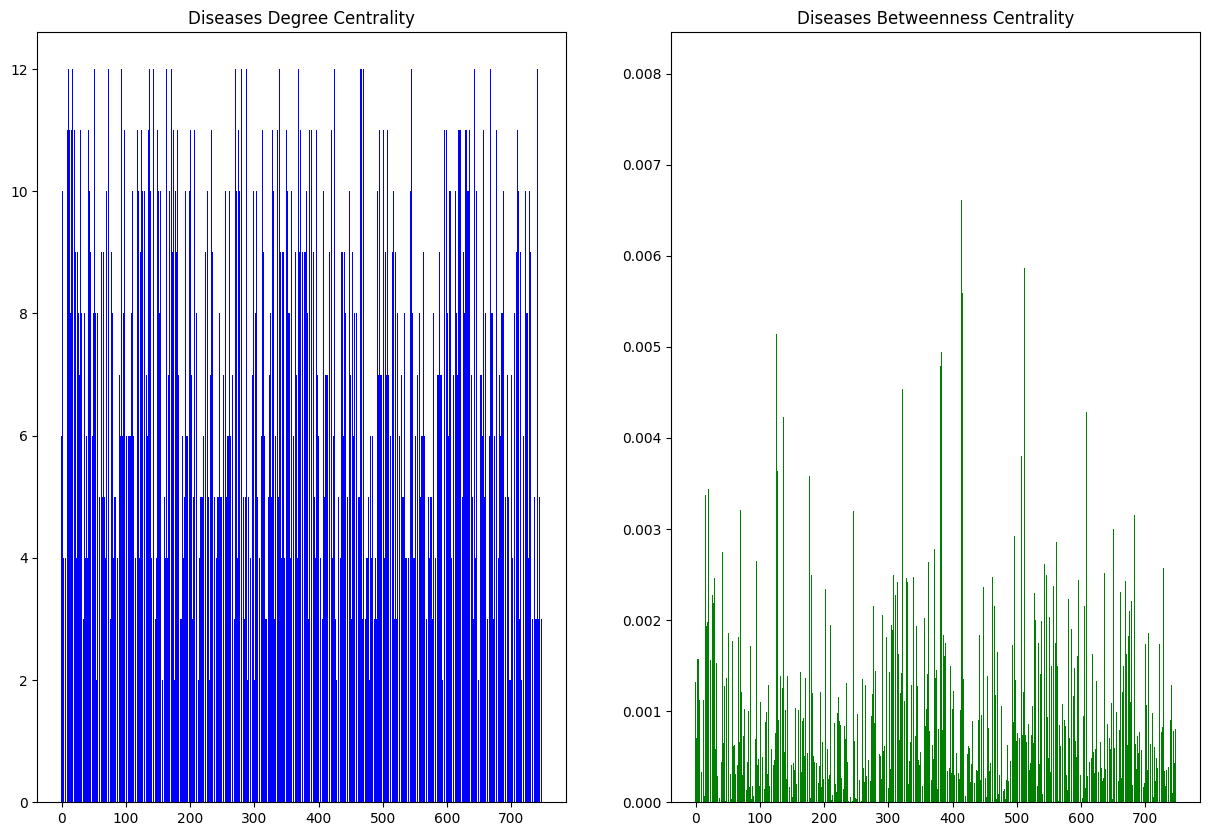

In [16]:
[kd, ks] = hid_hous(adjacency_matrix, 3)

# Compare degree centrality and betweenness centrality for the symptoms using UNIPARTITE projections
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Symptoms Degree Centrality")
plt.bar(range(ks.shape[0]), ks[:, 0], color="lightcoral", label="Degree Centrality")
plt.subplot(1, 2, 2)
plt.title("Symptoms Betweenness Centrality")

plt.bar(
    range(ks.shape[0]),
    list(symptoms_betweenness.values()),
    color="g",
    label="Betweenness Centrality",
)

# Compare degree centrality and betweenness centrality for the disease using UNIPARTITE projections
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Diseases Degree Centrality")
plt.bar(range(kd.shape[0]), kd[:, 0], color="b", label="Degree Centrality")
plt.subplot(1, 2, 2)
plt.title("Diseases Betweenness Centrality")
plt.bar(
    range(kd.shape[0]),
    list(diseases_betweenness.values()),
    color="g",
    label="Betweenness Centrality",
)

<Axes: xlabel='Symptom'>

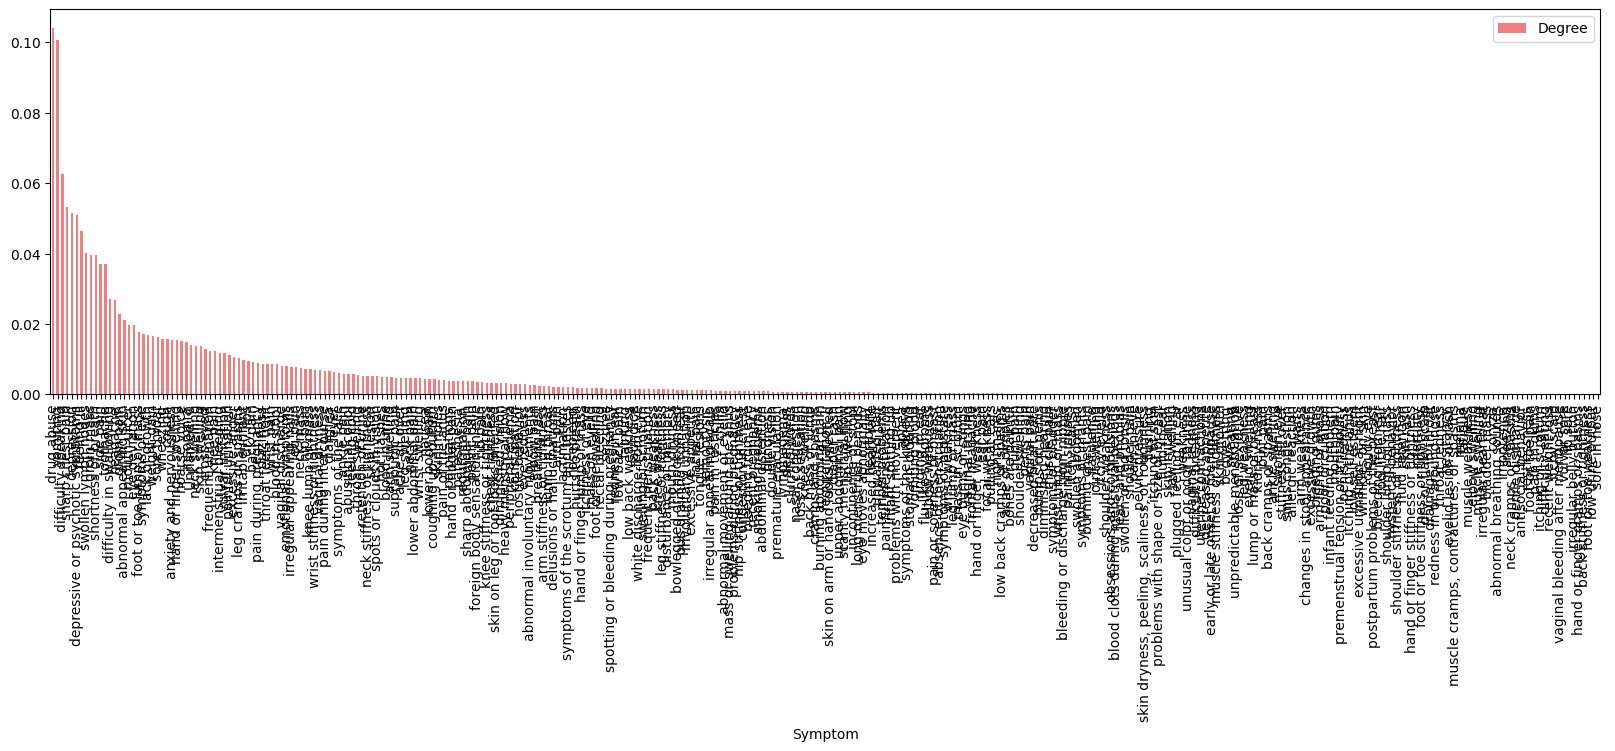

In [17]:
data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv", compression='gzip')
names = data_onehot.columns.values.tolist()
names = names[:-1]

# Sort the symptoms by betweenness centrality
sorted_index = np.argsort(graph_betweenness_symptoms_only)[::-1]
sorted_names = {names[i]: graph_betweenness_symptoms_only[i] for i in sorted_index}
sorted_names_L1 = pd.DataFrame(sorted_names.items(), columns=['Symptom', 'Degree'])
sorted_names_L1.plot.bar(x='Symptom', y='Degree', figsize=(20,5), color="lightcoral")


## Plot power law

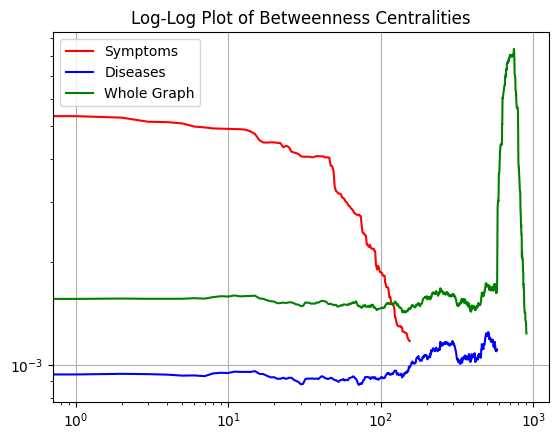

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Apply a simple moving average to smooth the data
symptoms_array = np.array(list(symptoms_betweenness.values()))
diseases_array = np.array(list(diseases_betweenness.values()))
graph_array = np.array(list(graph_betweenness.values()))
window_size = 170
sb = np.convolve(symptoms_array, np.ones(window_size) / window_size, mode="valid")
db = np.convolve(diseases_array, np.ones(window_size) / window_size, mode="valid")
gb = np.convolve(graph_array, np.ones(window_size) / window_size, mode="valid")
# Create log-log plot with smoothed data
plt.loglog(
    sb,
    linestyle="-",
    color="r",
    label="Symptoms",
)
plt.loglog(
    db,
    linestyle="-",
    color="b",
    label="Diseases",
)
plt.loglog(
    gb,
    linestyle="-",
    color="g",
    label="Whole Graph",
)


# Add labels and title
plt.title("Log-Log Plot of Betweenness Centralities")

# Show grid
plt.grid(True)

# Show legend
plt.legend()

# Show the plot
plt.show()

In [19]:
data = np.load("../prediction_model/features/betweennes.npz")
x, y = data['X'], data['y']

print(x.shape)
print(y.shape)

(246914, 325)
(246914,)
